In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv') #national_olympic_committee

In [3]:
df.sample(5)

ID                          Name Sex   Age  Height  Weight  \
266612  133370                 Yu Tae-Gyeong   M  27.0   184.0    74.0   
86619    43932          Jakob "Jack" Gnthard   M  32.0     NaN     NaN   
203236  102049               Volker Rohrwick   M  30.0   172.0    69.0   
100562   50849  Johannes Joseph "Jan" Hugens   M  21.0   184.0    83.0   
49853    25696            James-Andrew Davis   M  21.0   195.0    98.0   

                 Team  NOC        Games  Year  Season         City  \
266612    South Korea  KOR  1988 Summer  1988  Summer        Seoul   
86619     Switzerland  SUI  1952 Summer  1952  Summer     Helsinki   
203236   West Germany  FRG  1984 Summer  1984  Summer  Los Angeles   
100562    Netherlands  NED  1960 Summer  1960  Summer         Roma   
49853   Great Britain  GBR  2012 Summer  2012  Summer       London   

             Sport                                   Event Medal  
266612   Athletics              Athletics Men's 800 metres   NaN  
86619   Gymnastics  Gymnastics Men's Individual All-Around   NaN  
203236  Gymnastics         Gymnastics Men's Horizontal Bar   NaN  
100562     Cycling     Cycling Men's Road Race, Individual   NaN  
49853      Fencing                Fencing Men's Foil, Team   NaN

In [4]:
df.shape


(271116, 15)

In [5]:
df = df[df['Season']== "Summer"]

In [6]:
df.shape


(222552, 15)

In [7]:
region_df.sample(5)

NOC                  region notes
151  NRU                   Nauru   NaN
72   GAB                   Gabon   NaN
75   GBS           Guinea-Bissau   NaN
23   BIH  Bosnia and Herzegovina   NaN
87   HAI                   Haiti   NaN

In [8]:
df = df.merge(region_df, on = "NOC", how= "left")

In [9]:
df.sample(5)

ID                    Name Sex   Age  Height  Weight  \
192938  117919         Kaori Takahashi   F  22.0   165.0    56.0   
98566    60506  Thomas Jack "Tom" King   M  27.0   181.0    64.0   
157839   96257           Janez Porenta   M  27.0     NaN     NaN   
215045  130995          Daniel Winkler   M  26.0   171.0    70.0   
75988    46362     Patrick John Harvey   M  24.0   170.0    63.0   

                 Team  NOC        Games  Year  Season     City  \
192938          Japan  JPN  1996 Summer  1996  Summer  Atlanta   
98566       Australia  AUS  2000 Summer  2000  Summer   Sydney   
157839     Yugoslavia  YUG  1924 Summer  1924  Summer    Paris   
215045   West Germany  FRG  1988 Summer  1988  Summer    Seoul   
75988   Great Britain  GBR  1960 Summer  1960  Summer     Roma   

                        Sport                               Event   Medal  \
192938  Synchronized Swimming  Synchronized Swimming Women's Team  Bronze   
98566                 Sailing     Sailing Men's Two Person Dinghy    Gold   
157839             Gymnastics    Gymnastics Men's Team All-Around     NaN   
215045             Gymnastics        Gymnastics Men's Horse Vault     NaN   
75988       Modern Pentathlon  Modern Pentathlon Men's Individual     NaN   

           region       notes  
192938      Japan         NaN  
98566   Australia         NaN  
157839     Serbia  Yugoslavia  
215045    Germany         NaN  
75988          UK         NaN

In [10]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [11]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [12]:
df.duplicated().sum()

1385

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [16]:
print(df['Medal'].dtype)

object


In [17]:
pd.get_dummies(df['Medal'])


Bronze   Gold  Silver
0        False  False   False
1        False  False   False
2        False  False   False
3        False   True   False
4        False  False   False
...        ...    ...     ...
222547   False  False   False
222548   False  False   False
222549   False  False   False
222550   False  False   False
222551   False  False   False

[221167 rows x 3 columns]

In [18]:
df =pd.concat([df, pd.get_dummies(df['Medal'])], axis=1)

In [19]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  Bronze   Gold  Silver  
222547   NaN   False  False   False  
222548   NaN   False  False   False  
222549   NaN   False  False   False  
222550   NaN   False  False   False  
222551   NaN   False  False   False

In [20]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending = False).reset_index()

NOC  Gold  Silver  Bronze
0    USA  2472    1333    1197
1    URS   832     635     596
2    GBR   635     729     620
3    GER   592     538     649
4    ITA   518     474     454
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

In [21]:
medal_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Games',
       'Year', 'City', 'Sport', 'Event', 'Medal'])

In [22]:
medal_tally

ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222536  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222537  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222541  135560                    Stavroula Zygouri   F  36.0   171.0    63.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222536          Poland  POL  1980 Summer  1980  Summer       Moskva   
222537          Poland  POL  1980 Summer  1980  Summer       Moskva   
222541          Greece  GRE  2004 Summer  2004  Summer       Athina   

             Sport                                      Event   Medal  \
0       Basketball                Basketball Men's Basketball     NaN   
1             Judo               Judo Men's Extra-Lightweight     NaN   
2         Football                    Football Men's Football     NaN   
3       Tug-Of-War                Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics               Athletics Women's 100 metres     NaN   
...            ...                                        ...     ...   
222528   Athletics                 Athletics Women's Shot Put  Silver   
222530   Athletics                 Athletics Women's Shot Put  Bronze   
222536    Swimming        Swimming Men's 100 metres Butterfly     NaN   
222537    Swimming        Swimming Men's 200 metres Butterfly     NaN   
222541   Wrestling  Wrestling Women's Middleweight, Freestyle     NaN   

             region notes  Bronze   Gold  Silver  
0             China   NaN   False  False   False  
1             China   NaN   False  False   False  
2           Denmark   NaN   False  False   False  
3           Denmark   NaN   False   True   False  
4       Netherlands   NaN   False  False   False  
...             ...   ...     ...    ...     ...  
222528       Russia   NaN   False  False    True  
222530       Russia   NaN    True  False   False  
222536       Poland   NaN   False  False   False  
222537       Poland   NaN   False  False   False  
222541       Greece   NaN   False  False   False  

[105636 rows x 20 columns]

In [23]:
medal_tally =medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending = False).reset_index()

In [24]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [25]:
medal_tally

region  Gold  Silver  Bronze  Total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]

In [26]:
years = df['Year'].unique().tolist()

In [27]:
years.sort()


In [28]:
years.insert(0,'Overall')

In [29]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [30]:
country = np.unique(df['region'].dropna().values).tolist()

In [31]:
country.sort()
country


['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [32]:
country.insert(0,'Overall')

In [33]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [34]:
def fetch_medal_tally(df, year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games',
       'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if year == "Overall" and country == "Overall":
        temp_df = medal_df
    if year == "Overall" and country != "Overall":
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != "Overall" and country == "Overall":
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != "Overall" and country != "Overall":
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]

    if flag ==1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending = False).reset_index()
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']
    print(x)

In [35]:
fetch_medal_tally(df,year ='1900' , country = "India")

  region  Gold  Silver  Bronze  Total
0  India     0       2       0      2


In [36]:
medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games',
       'Year', 'City', 'Sport', 'Event', 'Medal'])

In [37]:
medal_df[medal_df['region'] == "India"]

ID                                           Name Sex   Age  \
436        281                                 S. Abdul Hamid   M   NaN   
437        281                                 S. Abdul Hamid   M   NaN   
790        512                Shiny Kurisingal Abraham-Wilson   F  19.0   
791        512                Shiny Kurisingal Abraham-Wilson   F  19.0   
792        512                Shiny Kurisingal Abraham-Wilson   F  23.0   
...        ...                                            ...  ..   ...   
216942  132143                            Vikas Krishan Yadav   M  24.0   
216985  132177                           Mohammad Anas Yahiya   M  21.0   
218411  133029  Thyadathuvilla Chandrapillai "T. C." Yohannan   M  29.0   
222416  135480                                   Geeta Zutshi   F  23.0   
222417  135480                                   Geeta Zutshi   F  27.0   

        Height  Weight   Team  NOC        Games  Year  Season            City  \
436        NaN     NaN  India  IND  1928 Summer  1928  Summer       Amsterdam   
437        NaN     NaN  India  IND  1928 Summer  1928  Summer       Amsterdam   
790      167.0    53.0  India  IND  1984 Summer  1984  Summer     Los Angeles   
791      167.0    53.0  India  IND  1984 Summer  1984  Summer     Los Angeles   
792      167.0    53.0  India  IND  1988 Summer  1988  Summer           Seoul   
...        ...     ...    ...  ...          ...   ...     ...             ...   
216942   177.0    69.0  India  IND  2016 Summer  2016  Summer  Rio de Janeiro   
216985   177.0    69.0  India  IND  2016 Summer  2016  Summer  Rio de Janeiro   
218411   174.0    62.0  India  IND  1976 Summer  1976  Summer        Montreal   
222416   167.0    51.0  India  IND  1980 Summer  1980  Summer          Moskva   
222417   167.0    51.0  India  IND  1984 Summer  1984  Summer     Los Angeles   

            Sport                                   Event Medal region notes  \
436     Athletics      Athletics Men's 110 metres Hurdles   NaN  India   NaN   
437     Athletics      Athletics Men's 400 metres Hurdles   NaN  India   NaN   
790     Athletics            Athletics Women's 800 metres   NaN  India   NaN   
791     Athletics  Athletics Women's 4 x 400 metres Relay   NaN  India   NaN   
792     Athletics            Athletics Women's 800 metres   NaN  India   NaN   
...           ...                                     ...   ...    ...   ...   
216942     Boxing               Boxing Men's Middleweight   NaN  India   NaN   
216985  Athletics              Athletics Men's 400 metres   NaN  India   NaN   
218411  Athletics               Athletics Men's Long Jump   NaN  India   NaN   
222416  Athletics            Athletics Women's 800 metres   NaN  India   NaN   
222417  Athletics          Athletics Women's 3,000 metres   NaN  India   NaN   

        Bronze   Gold  Silver  
436      False  False   False  
437      False  False   False  
790      False  False   False  
791      False  False   False  
792      False  False   False  
...        ...    ...     ...  
216942   False  False   False  
216985   False  False   False  
218411   False  False   False  
222416   False  False   False  
222417   False  False   False  

[687 rows x 20 columns]

# Overall Analysis
- No. of editions
- No. of cities
- No. of events/sports
- No. of Athletes
- Participating Nations

In [38]:
df.head(3)

ID                 Name Sex   Age  Height  Weight     Team  NOC  \
0   1            A Dijiang   M  24.0   180.0    80.0    China  CHN   
1   2             A Lamusi   M  23.0   170.0    60.0    China  CHN   
2   3  Gunnar Nielsen Aaby   M  24.0     NaN     NaN  Denmark  DEN   

         Games  Year  Season       City       Sport  \
0  1992 Summer  1992  Summer  Barcelona  Basketball   
1  2012 Summer  2012  Summer     London        Judo   
2  1920 Summer  1920  Summer  Antwerpen    Football   

                          Event Medal   region notes  Bronze   Gold  Silver  
0   Basketball Men's Basketball   NaN    China   NaN   False  False   False  
1  Judo Men's Extra-Lightweight   NaN    China   NaN   False  False   False  
2       Football Men's Football   NaN  Denmark   NaN   False  False   False

In [39]:
df["Year"].unique().shape[0] -1

28

In [40]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [41]:
df["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [42]:
df["Event"].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

In [43]:
df["Name"].unique().shape

(116122,)

In [44]:
df["region"].unique().shape

(206,)

In [45]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze   Gold  \
0   Basketball Men's Basketball   NaN        China   NaN   False  False   
1  Judo Men's Extra-Lightweight   NaN        China   NaN   False  False   
2       Football Men's Football   NaN      Denmark   NaN   False  False   
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN   False   True   
4  Athletics Women's 100 metres   NaN  Netherlands   NaN   False  False   

   Silver  
0   False  
1   False  
2   False  
3   False  
4   False

In [46]:
nations_over_time = df.drop_duplicates(['Year','region'])["Year"].value_counts().reset_index().sort_values(by = 'Year')

In [47]:
nations_over_time

Year  count
28  1896     12
22  1900     31
27  1904     14
26  1906     20
25  1908     22
24  1912     29
23  1920     29
21  1924     45
20  1928     46
19  1932     47
18  1936     49
17  1948     59
16  1952     67
15  1956     71
13  1960     83
11  1964     93
10  1968    111
9   1972    120
12  1976     91
14  1980     80
8   1984    139
7   1988    156
6   1992    168
5   1996    196
4   2000    199
3   2004    200
2   2008    202
1   2012    203
0   2016    204

In [48]:
nations_over_time.rename(columns = {"Year": "Edition", 'count': "No. of Countries"}, inplace=True)

In [49]:
import plotly.express as px

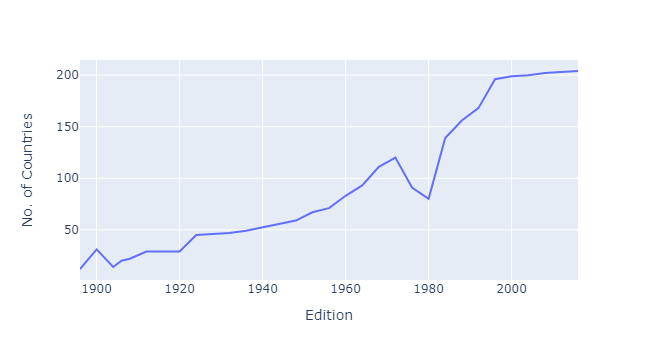

In [50]:
fig = px.line(nations_over_time, x = "Edition", y = "No. of Countries")
fig.show()

In [51]:
import seaborn as sns
import matplotlib.pyplot as  plt

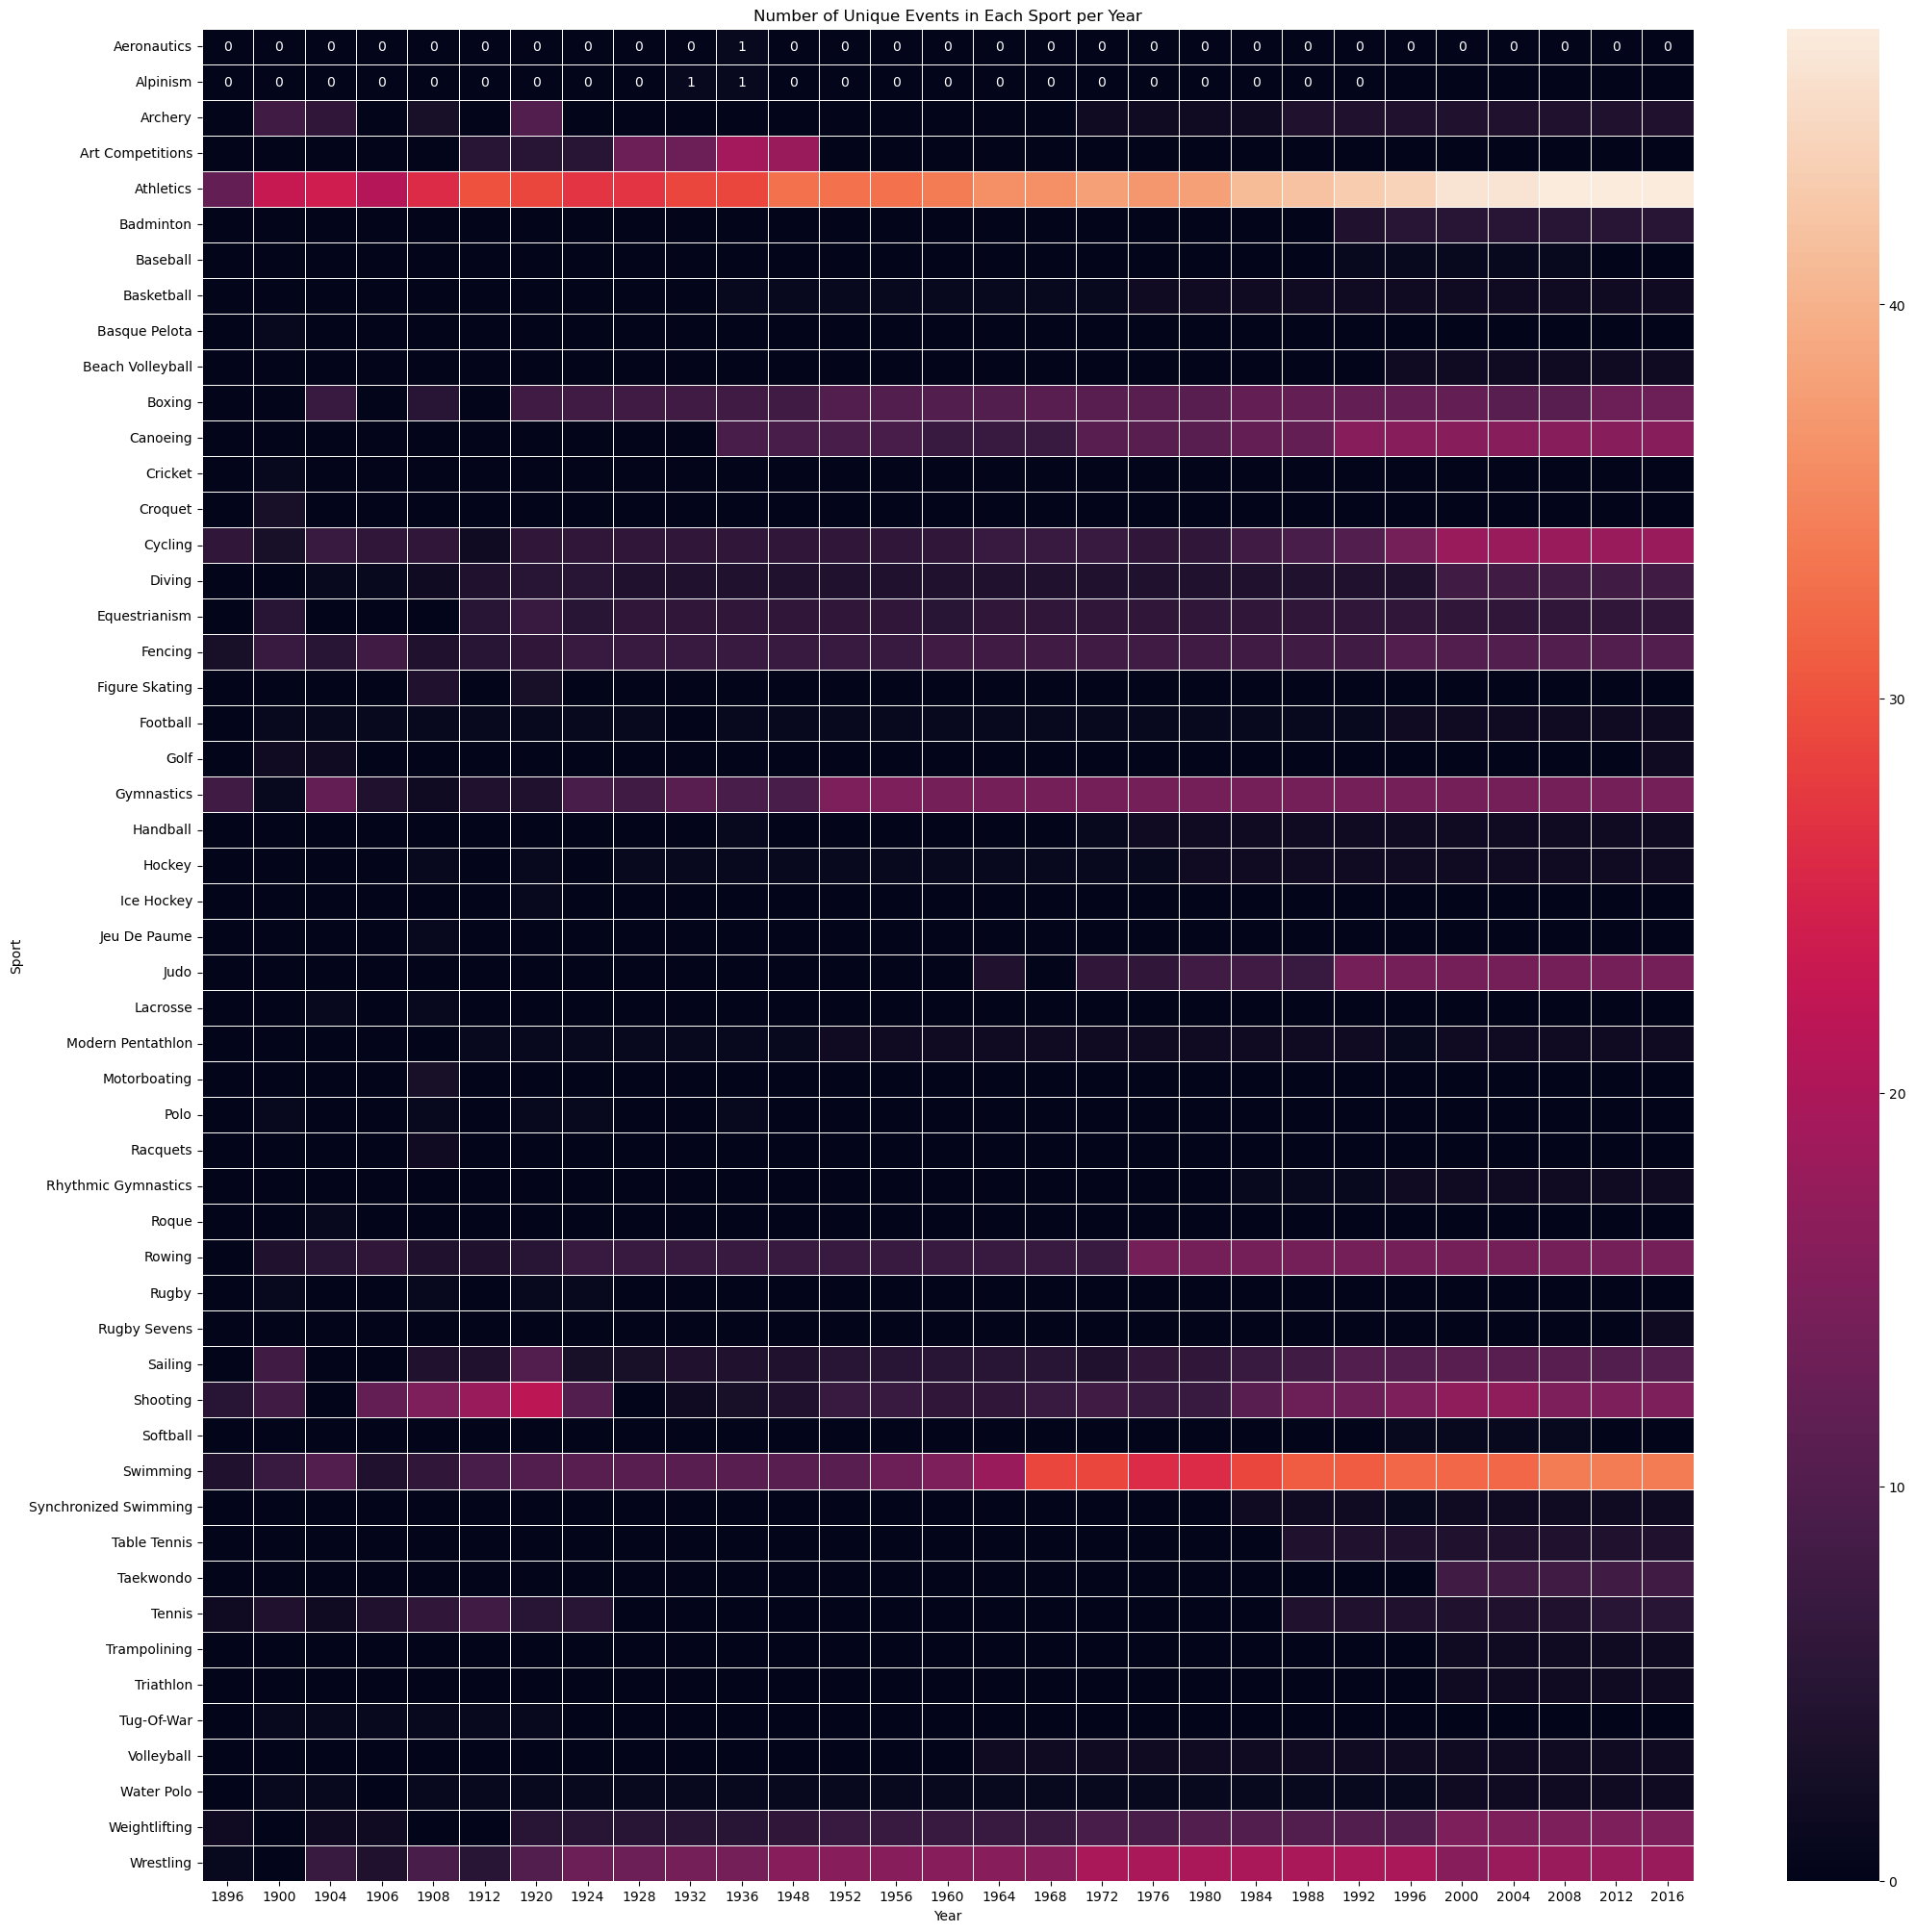

In [52]:

unique_events = df.drop_duplicates(['Year', 'Sport', 'Event'])

pivot_table = unique_events.pivot_table(
    index='Sport', columns='Year', values='Event', aggfunc='count'
).fillna(0).astype(int)

# Plot the heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(pivot_table, annot=True,  linewidths=.5)
plt.title('Number of Unique Events in Each Sport per Year')
plt.xlabel('Year')
plt.ylabel('Sport')
plt.show()

In [53]:

import pandas as pd

def most_successful(df, sport='Overall'):
    temp_df = df.dropna(subset=['Medal'])
    if sport != 'Overall':
        temp_df = temp_df[temp_df["Sport"] == sport]

    top_athletes = temp_df['Name'].value_counts().reset_index().head(15)
    top_athletes.columns = ['Name', 'Medals']

    result = pd.merge(top_athletes, df, left_on='Name', right_on='Name', how='left')

    result = result[['Name', 'Medals', 'Sport', 'Team']].drop_duplicates('Name')

    return result

In [54]:
most_successful(df, 'Swimming')

Name  Medals     Sport  \
0                            Michael Fred Phelps, II      28  Swimming   
30   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12  Swimming   
47              Dara Grace Torres (-Hoffman, -Minas)      12  Swimming   
60                                Ryan Steven Lochte      12  Swimming   
74                     Natalie Anne Coughlin (-Hall)      12  Swimming   
86                    Matthew Nicholas "Matt" Biondi      11  Swimming   
98                                 Mark Andrew Spitz      11  Swimming   
110                             Gary Wayne Hall, Jr.      10  Swimming   
120                            Franziska van Almsick      10  Swimming   
143                        Shirley Frances Babashoff       9  Swimming   
154                                 Ian James Thorpe       9  Swimming   
164                               Leisel Marie Jones       9  Swimming   
174                    Aleksandr Vladimirovich Popov       9  Swimming   
189                         Zoltn Imre dn von Halmay       9  Swimming   
198                  Donald Arthur "Don" Schollander       8  Swimming   

              Team  
0    United States  
30   United States  
47   United States  
60   United States  
74   United States  
86   United States  
98   United States  
110  United States  
120        Germany  
143  United States  
154      Australia  
164      Australia  
174   Unified Team  
189        Hungary  
198  United States

# Country Wise
- Countrywise medal tally per year(line plot)
- What countries are good at heatmap
- Most successful Athletes(Top10)

In [55]:
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze   Gold  Silver  
0        NaN   False  False   False  
1        NaN   False  False   False  
2        NaN   False  False   False  
3        NaN   False   True   False  
4        NaN   False  False   False  
...      ...     ...    ...     ...  
222547   NaN   False  False   False  
222548   NaN   False  False   False  
222549   NaN   False  False   False  
222550   NaN   False  False   False  
222551   NaN   False  False   False  

[221167 rows x 20 columns]

In [56]:
temp_df = df.dropna(subset= ["Medal"])
temp_df.drop_duplicates(subset = ['Team', 'NOC', 'Games','Year','City', 'Sport', 'Event', 'Medal'], inplace = True)

C:\Users\admin\AppData\Local\Temp\ipykernel_1204\2523493310.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
new_df = temp_df[temp_df['region'] == 'India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

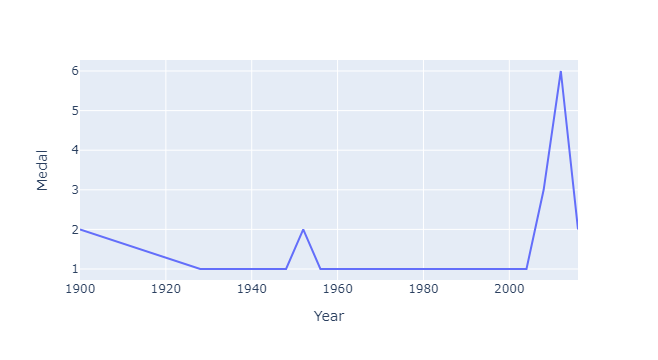

In [58]:
fig = px.line(final_df, x = 'Year', y = 'Medal')
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

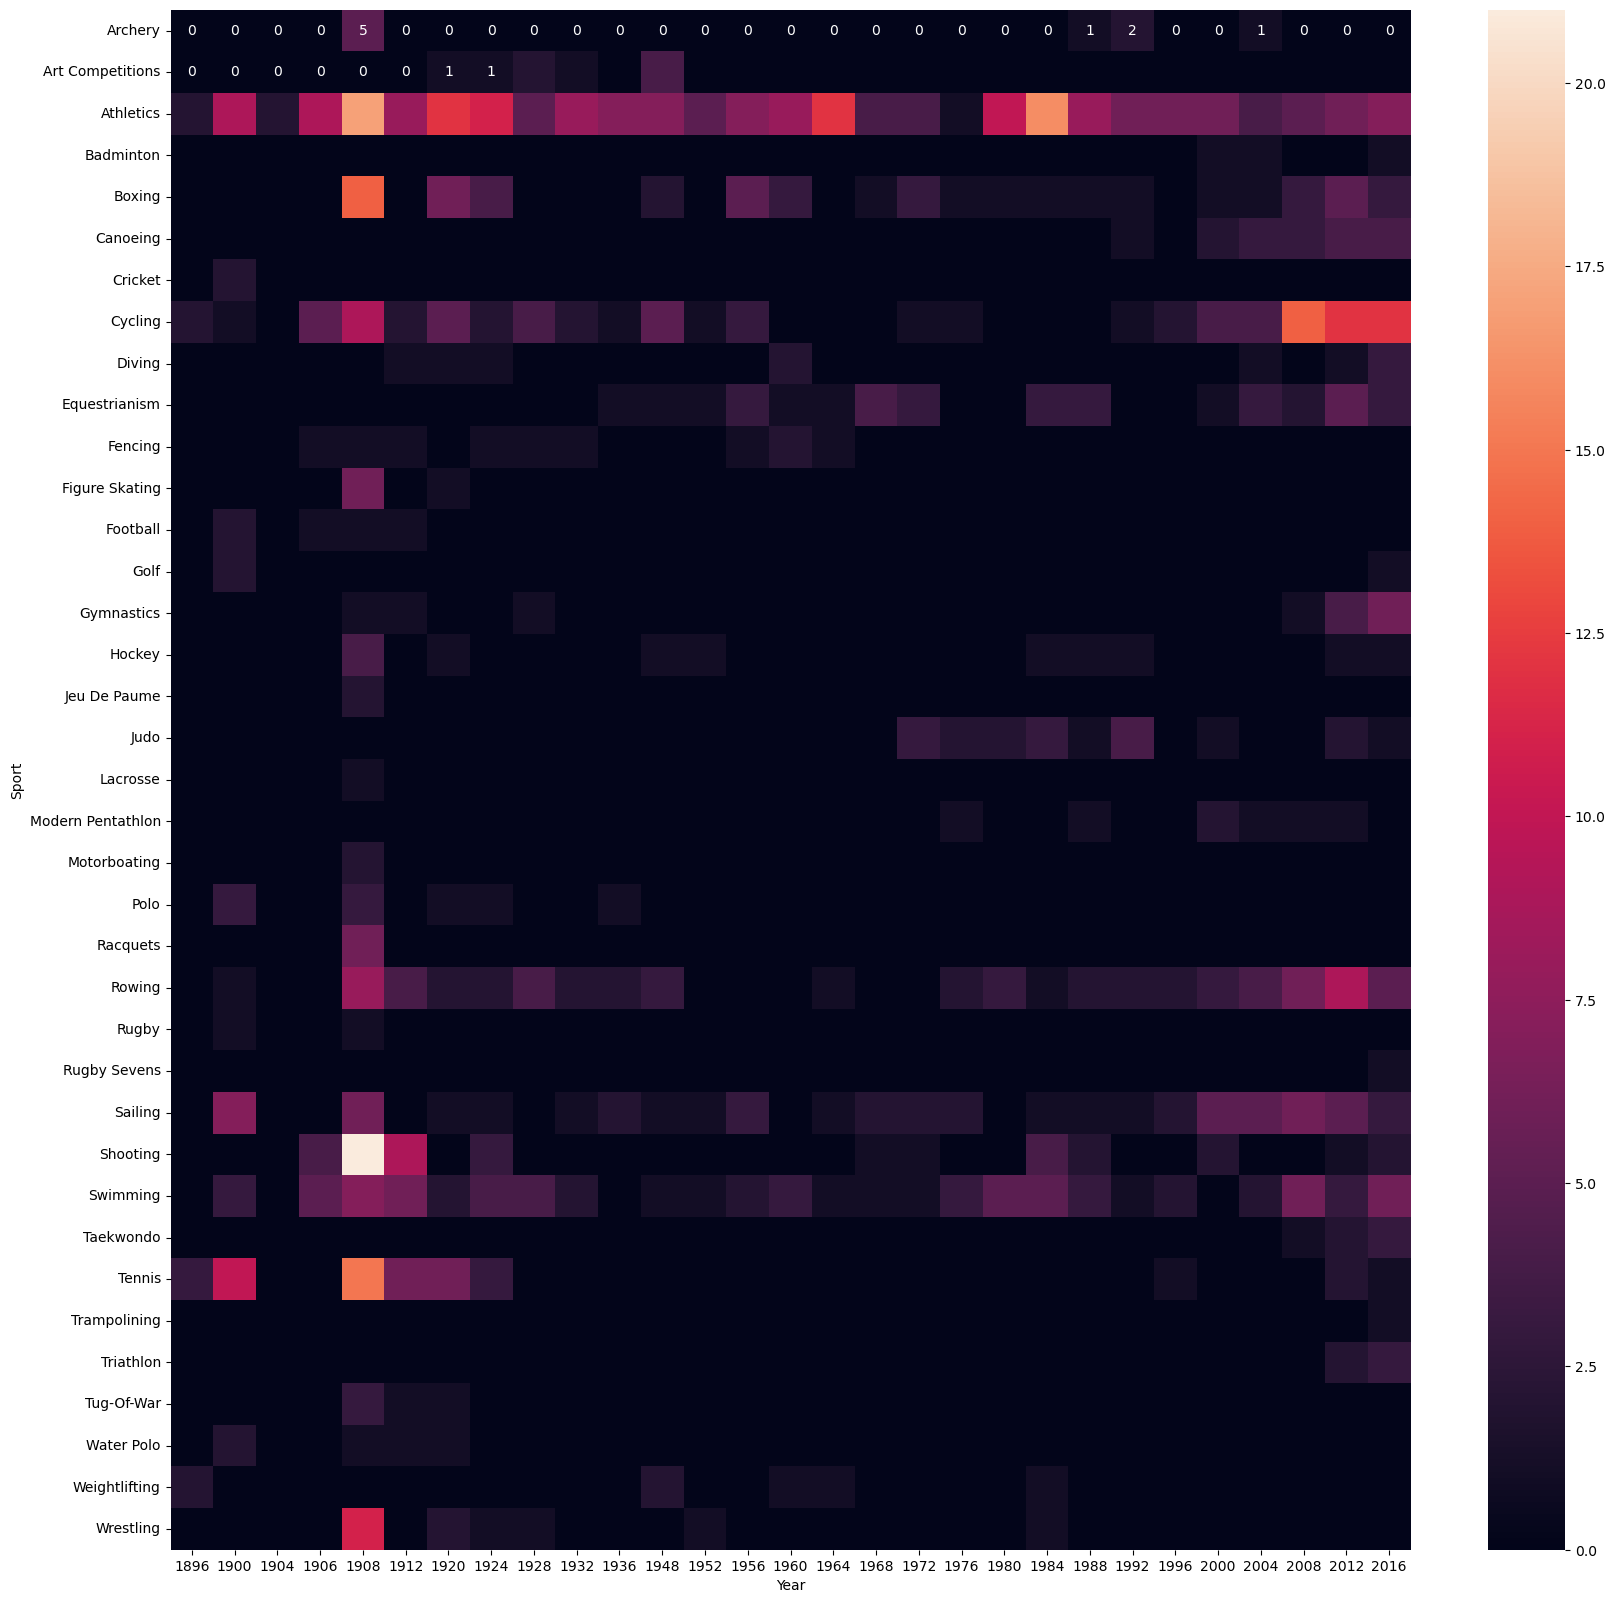

In [59]:
new_df = temp_df[temp_df['region'] == 'UK']
plt.figure(figsize= (20,20))
sns.heatmap(new_df.pivot_table(index='Sport', columns = 'Year', values = 'Medal',aggfunc= 'count').fillna(0),annot = True)

In [60]:
def most_successful(df, country):
    temp_df = df.dropna(subset=['Medal'])
  
    temp_df = temp_df[temp_df["region"] == country]

    top_athletes = temp_df['Name'].value_counts().reset_index().head(15)
    top_athletes.columns = ['Name', 'Medals']

    result = pd.merge(top_athletes, df, left_on='Name', right_on='Name', how='left')

    result = result[['Name', 'Medals', 'Sport']].drop_duplicates('Name')

    return result

In [61]:
most_successful(df, 'USA')

Name  Medals      Sport
0                            Michael Fred Phelps, II      28   Swimming
30                                Ryan Steven Lochte      12   Swimming
44   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12   Swimming
61                     Natalie Anne Coughlin (-Hall)      12   Swimming
73              Dara Grace Torres (-Hoffman, -Minas)      12   Swimming
86                    Matthew Nicholas "Matt" Biondi      11   Swimming
98                              Carl Townsend Osburn      11   Shooting
114                                Mark Andrew Spitz      11   Swimming
126                      Raymond Clarence "Ray" Ewry      10  Athletics
136                   Frederick Carlton "Carl" Lewis      10  Athletics
146                             Gary Wayne Hall, Jr.      10   Swimming
156                           Allyson Michelle Felix       9  Athletics
166                           Martin Joseph Sheridan       9  Athletics
181                        Shirley Frances Babashoff       9   Swimming
192                           Nathan Ghar-Jun Adrian       8   Swimming

In [62]:
import plotly.figure_factory as ff

In [63]:
athlete_df = df.drop_duplicates(subset = ['Name', 'region'])

In [64]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

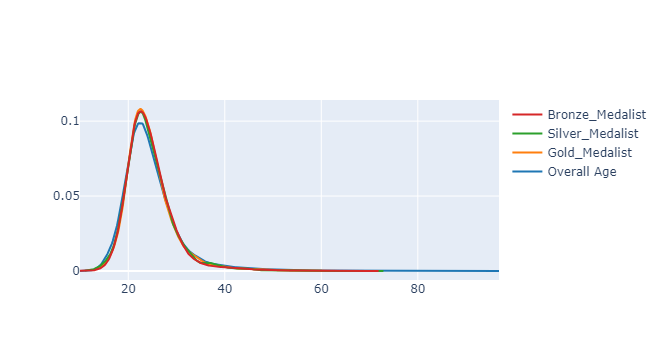

In [65]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold_Medalist','Silver_Medalist','Bronze_Medalist'],show_hist=False, show_rug= False)
fig.show()

In [66]:
x = []
name = []
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)


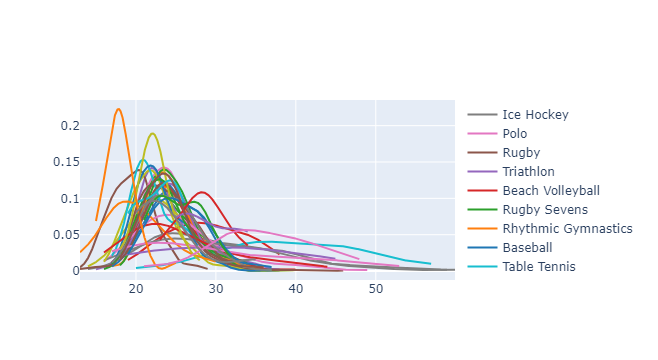

In [67]:
fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
fig.show()

In [70]:
athlete_df.fillna({'Medal':"No Medal"},inplace = True)

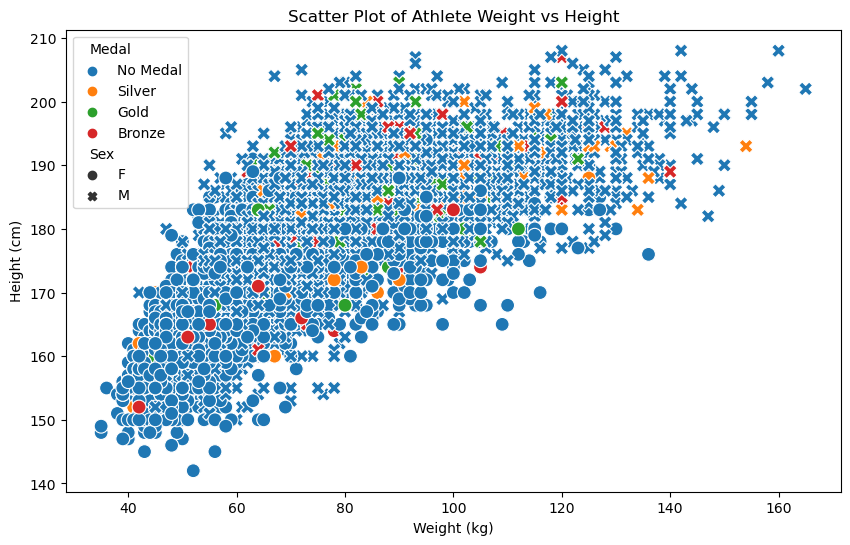

In [74]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
temp_df = athlete_df[athlete_df['Sport']=='Athletics']
sns.scatterplot(x='Weight', y='Height', data=temp_df, hue = temp_df ['Medal'],style = temp_df['Sex'], s= 100 )

# Add labels and title
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Scatter Plot of Athlete Weight vs Height')

# Show the plot
plt.show()

In [75]:
men = athlete_df[athlete_df['Sex']== 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex']== 'F'].groupby('Year').count()['Name'].reset_index()

In [76]:
final = men.merge(women, on = 'Year')
final.rename(columns= {'Name_x': 'Male', 'Name_y': 'Female' }, inplace = True)

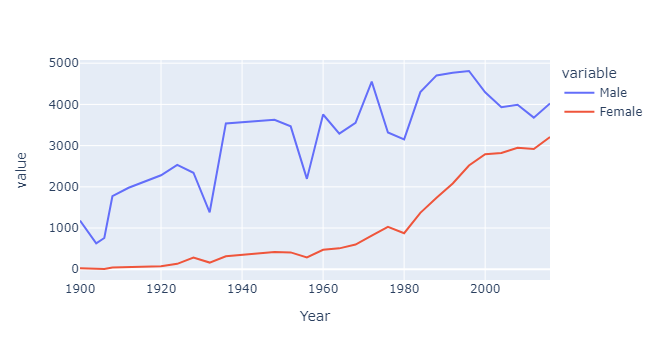

In [77]:
fig = px.line(final, x = 'Year', y = ['Male', 'Female'])
fig.show()